In [2]:
import os
import pickle
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.interpolate import interp1d
from matplotlib.colors import Normalize
import traceback
import matplotlib.gridspec as gridspec

'''
Obviously need SimInfo pickles from Config_dir
Update the newest Merians from update_merians.ipynb
what needs to be run to make this work
Reff and Profiles from ImageCollection, dont think I need to run isophote masking, except maybe for x00y00
StShapes, DMShapes from 3DShapes
smoothed shapes from 3DShapesSmoothing
halotypes from halotypes.py, in the case of Merians they are all simply centrals
masses from get_masses.py
try/except blocks should catch any mismatches, so don't need to worry too much about everything being perfect. 
'''
    
def T(ba,ca):
    return( (1-ba**2)/(1-ca**2) )



In [10]:
import StellarDMTracing as sdt


def nanfunction(x):
    return x*0 +10
#define color scheme to use for plots as a dict


In [ ]:
def main(B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,label,reff_multi =1):
    data_type = 'all'


    print(len(masses),len(htype))
    #condition0 = (np.log10(10**masses/mvir) < -2)  &  (( C_s >.5 ) & (B_s > .6 )) & (( C_d >.5 ) & (B_d > .6 )) & (masses > 6) & (masses < 9) & (reff < 1)
    #print(sum(condition0))
            
    mb = np.log10(10**masses/mvir)

    

    

    T_diff = np.array((T_d - T_s))
    avg_B = 1#np.average([B_d, B_s], axis=0)
    avg_C = 1#np.average([C_d, C_s], axis=0)
    distances = (np.sqrt(((B_d - B_s) / avg_B) ** 2 + ((C_d - C_s) / avg_C) ** 2))

    #angles = compute_angle_between_ellipsoids(Ed, Es)
    #print(angles[0])



    # Define conditions
    
    #condition1 = (mb < -2)  &  (( C_s >.5 ) & (B_s > .6 )) & (( C_d >.5 ) & (B_d > .6 )) & (masses > 6) & (masses < 9) & (reff < 1)
    #print(sum(condition1))
    #(mb < -1.5) & ((C_s > 0.5) & (B_s > 0.6)) & ((C_d > 0.4) & (B_d > 0.5)) & (masses > 6) & (masses < 9) & (reff < 1)


    
    ### initialize conditions filters ###
    condition = (mb < -2.5)  
    cm = masses
    #condition1 = feedback_type == 'MerianCDM'
    #condition2 = feedback_type == 'BW'
    #condition3 = T_s <.3 
    #condition6 = T_s >.7
    #conditions = [("All", None),('Dark Matter Dominated',condition), ("Merians", condition1), ('DCJL+Marvel',condition2), ('Disky',condition3), ('Prolate',condition6)]
    conditions = [("Marvel+DCJL+Merians", None),]
    #create_histograms(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, conditions,reff_multi)
    plt.close()

    # n = len(conditions)
    # rows = n // 2
    # if n % 2 != 0:
    #     rows += 1
    n = 1


    #axes = axes.flatten()
    # mean_T_diff,std_T_diff, mean_distances , std_distances = np.zeros((n)),np.zeros((n)),np.zeros((n)),np.zeros((n))
    # for i, (label, condition) in enumerate(conditions):
    #     print(label)
    #     print(condition)
    #     mean_T_diff[i],std_T_diff[i], mean_distances[i] , std_distances[i] = analyze_distances(T_diff, distances, condition=condition)
    #     plot_data(axes[i], B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir,feedback_type, condition=condition)
    #     axes[i].set_title(label)
    
    sdt.plot_data(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type, condition=None)
    
    
    # Save the figure
    plt.tight_layout()
    plt.savefig(f'../../Figures/3DShapes/SVQ_hist_combined.{reff_multi}.png', dpi=300)
    #plt.close()
    #print(Ed[0,:,:])
    #plot_ellipsoid_axes(Ed[1,:,:], Es[1,:,:])
    sdt.T_vs_Mstar(T_d,T_s,masses,mb,htype,label)    
    plt.close()
    
    # distances = np.sqrt((B_d - B_s)**2 + (C_d - C_s)**2)
    # plt.figure()
    # plt.scatter(masses,distances)
    # plt.xlabel('Stellar Mass')
    # plt.ylabel('Shape Distance')
    # plt.show()

    return mean_T_diff,std_T_diff, mean_distances, std_distances

    





#r = np.array((.25,.5,.75,1,1.25,1.5,2))
r = np.array((1,))
n = 1
mean_T_diff = np.zeros((n, len(r)))
std_T_diff = np.zeros((n, len(r)))
mean_distances = np.zeros((n, len(r)))
std_distances = np.zeros((n, len(r)))
SimFilePath = ['../PickleFiles/SimulationInfo.BW.pickle','../PickleFiles/SimulationInfo.MerianCDM.pickle']
MassPath = ['../../Data/BasicData/Marvel_DCJL.Masses.pickle','../../Data/BasicData/MerianCDM.Masses.pickle']
HaloTypePath = ['../../Data/BasicData/HaloTypes.txt','../../Data/BasicData/HaloTypes.MerianCDM.txt']
feedback = ['BW','MerianCDM']

for i in range(0, len(r) ):
    
    mean_T_diff[:,i],std_T_diff[:,i], mean_distances[:,i] , std_distances[:,i] = main(B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,label = 'CDM',reff_multi = r[i])

#mean_T_diff[:,i],std_T_diff[:,i], mean_distances[:,i] , std_distances[:,i] = main(r[i])
#plt.errorbar(r,mean_T_diff,std_T_diff)
#plt.errorbar(r,mean_distances,std_distances)

In [42]:
feedbacks = ['BWMDC', 'MerianCDM']
#feedbacks = [ 'MerianCDM']

import importlib
importlib.reload(sdt)
B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,mb_reff,mb_10rvir,htype,reff,mvir,feedback_type,sims,hids,mergers,rvir,diffs_at_reff, jz_jcirc_avgs,t_dyn = sdt.LoadSimData(feedbacks,return_sims=True,reff_multi=1)


#print len of number of b_d, c_d, b_s, c_s = 10
print(len(B_s[B_s == 10]),len(C_s[C_s == 10]),len(B_d[B_d == 10]),len(C_d[C_d == 10]))

#remove unphysical values where c > b
mask = C_s > B_s
B_s = B_s[~mask]
C_s = C_s[~mask]
T_s = T_s[~mask]
B_d = B_d[~mask]
C_d = C_d[~mask]
T_d = T_d[~mask]
masses = masses[~mask]
mb = mb[~mask]
mb_reff = mb_reff[~mask]
mb_10rvir = mb_10rvir[~mask]
htype = htype[~mask]
reff = reff[~mask]
mvir = mvir[~mask]
feedback_type = feedback_type[~mask]
sims = sims[~mask]
hids = hids[~mask]
#mergers = mergers[~mask]
rvir = rvir[~mask]
diffs_at_reff = diffs_at_reff[~mask]
jz_jcirc_avgs = jz_jcirc_avgs[~mask]
t_dyn = t_dyn[~mask]
#print(len(sims))

print(len(sims))

#create histograms of mb,mb_reff,mb_10rvir
#plot histograms of mb,mb_reff,mb_10rvir
#create histograms of mb, mb_reff, mb_10rvir with outline only

#split into marvel, DCJL, Merians
#marvel is composed of sims with names cptmarvel,storm,rogue,elektra,
#DCJL is composed of sims with names h148 h229 h242 h329
#Merians have sim names like r with a number following it

['../PickleFiles/SimulationInfo.BWMDC.pickle', '../PickleFiles/SimulationInfo.MerianCDM.pickle']
Error loading diff_at_Reff for sim cptmarvel halo 1
Error loading diff_at_Reff for sim cptmarvel halo 2
Error loading diff_at_Reff for sim cptmarvel halo 3
Error loading diff_at_Reff for sim cptmarvel halo 5
Error loading diff_at_Reff for sim cptmarvel halo 6
Error loading diff_at_Reff for sim cptmarvel halo 7
Error loading diff_at_Reff for sim elektra halo 1
Error loading diff_at_Reff for sim elektra halo 2
Error loading diff_at_Reff for sim elektra halo 3
Error loading diff_at_Reff for sim elektra halo 4
Error loading diff_at_Reff for sim elektra halo 5
Error loading diff_at_Reff for sim elektra halo 9
Error loading diff_at_Reff for sim elektra halo 10
Error loading diff_at_Reff for sim storm halo 1
Error loading diff_at_Reff for sim storm halo 2
Error loading diff_at_Reff for sim storm halo 3
Error loading diff_at_Reff for sim storm halo 4
Error loading diff_at_Reff for sim storm halo 5


In [9]:
print(sims,masses,B_d)

['h242' 'h242' 'r431' 'r442' 'r468' 'r488' 'r489' 'r492' 'r502' 'r515'
 'r523' 'r544' 'r552' 'r555' 'r556' 'r563' 'r568' 'r569' 'r571' 'r597'
 'r613' 'r614' 'r615' 'r618' 'r634' 'r642' 'r656' 'r718' 'r753' 'r761'
 'r850' 'r852' 'r918'] [8.9032407  8.90065123 9.17068787 9.17532028 9.3119725  9.24227096
 8.89988879 9.07447935 9.15238276 9.04193185 8.7272501  8.89707742
 8.58115125 8.94020599 9.03632676 8.6083191  9.28580423 8.67784635
 8.64359738 8.7386438  8.73924651 8.63177979 9.47326428 8.64310027
 8.64790318 8.69410742 8.76129528 8.24191794 8.03302512 8.13167486
 7.99987601 8.0503184  8.67452256] [0.89986561 0.93275102 0.96684138 0.88544116 0.85319562 0.82153094
 0.78825227 0.85341704 0.84269359 0.85020189 0.85559332 0.92148567
 0.88433747 0.69190838 0.76624347 0.63769013 0.847044   0.88484254
 0.95789514 0.92349114 0.92195558 0.98273358 0.49638489 0.66989002
 0.96734064 0.92516063 0.94481362 0.82305104 0.80972348 0.79592878
 0.74528344 0.70387825 0.75929386]


In [43]:

#create marvel mask
marvel_mask = np.zeros(len(sims),dtype=bool)
for sim in ['cptmarvel','storm','rogue','elektra']:
    marvel_mask[sims == sim] = True

print(sims[marvel_mask])
#DCJL mask
DCJL_mask = np.zeros(len(sims),dtype=bool)
for sim in ['h148','h229','h242','h329']:
    DCJL_mask[sims == sim] = True
print(sims[DCJL_mask])

#Merians mask
Merians_mask = np.zeros(len(sims),dtype=bool)
for sim in sims:
    if sim[0] == 'r':
        Merians_mask[sims == sim] = True
    if sim == 'rogue':
        Merians_mask[sims == sim] = False
print(sims[Merians_mask])



['cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel'
 'elektra' 'elektra' 'elektra' 'elektra' 'elektra' 'elektra' 'elektra'
 'storm' 'storm' 'storm' 'storm' 'storm' 'storm' 'storm' 'storm' 'storm'
 'storm' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue']
['h148' 'h148' 'h148' 'h148' 'h148' 'h148' 'h148' 'h148' 'h229' 'h229'
 'h229' 'h229' 'h242' 'h242']
['r431' 'r442' 'r468' 'r488' 'r489' 'r492' 'r502' 'r515' 'r523' 'r544'
 'r552' 'r555' 'r556' 'r563' 'r568' 'r569' 'r571' 'r597' 'r613' 'r614'
 'r615' 'r618' 'r634' 'r642' 'r656' 'r716' 'r718' 'r753' 'r761' 'r850'
 'r852' 'r886' 'r916' 'r918' 'r977']


In [44]:



import matplotlib.pyplot as plt
import numpy as np

def plot_histograms_with_masks(mb, mb_reff, mb_10rvir, feedback_type, masks_labels):
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    #flatten axes
    axes = axes.flatten()
    bins = np.logspace(-4, 0, 50).tolist()
    lw = 2

    for ax, (mask, label) in zip(axes, masks_labels):
        ax.hist(mb[mask], bins=bins, alpha=1, label=f'Baryonic fraction within virial radius ({label})', histtype='step', lw=lw)
        ax.hist(mb_reff[mask], bins=bins, alpha=1, label=f'Baryonic fraction within effective radius ({label})', histtype='step', lw=lw)
        ax.hist(mb_10rvir[mask], bins=bins, alpha=1, label=f'Baryonic fraction within 10% of virial radius ({label})', histtype='step', lw=lw)
        ax.set_xlabel(r'f$_b$')
        ax.set_ylabel('Number of Galaxies')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend()
        ax.set_title(label)

    plt.tight_layout()
    plt.show()

# Example usage:
masks_labels = [(marvel_mask, 'Marvel'), (DCJL_mask, 'DCJL'), (Merians_mask, 'Merians'), (np.ones(len(sims),dtype=bool), 'All')]
#plot_histograms_with_masks(mb, mb_reff, mb_10rvir, feedback_type, masks_labels)




#mask out disk galaxies
#list of sims halos with disk galaxies
# disk_sims_pickle = 'disk_sims_results.pickle'
#
# disk_sims = pickle.load(open(disk_sims_pickle,'rb'))
disk_sims = {}
for feedback in feedbacks:
    # with open(f'galaxy_classifications_{feedback}.pickle', 'wb') as f:
    #     pickle.dump(classified_galaxies, f)
    try:
        with open(f'galaxy_classifications_{feedback}.pickle', 'rb') as f:
            classified_galaxies = pickle.load(f)
            disk_sims.update(classified_galaxies)
    except FileNotFoundError:
        print(f'File galaxy_classifications_{feedback}.pickle not found')
        continue


#combine all classified galaxies


print(hids)
mask = np.zeros(len(sims), dtype=bool)
disk_mask = np.zeros(len(sims), dtype=bool)
ellip_mask = np.zeros(len(sims), dtype=bool)
irr_mask = np.zeros(len(sims), dtype=bool)

for sim in disk_sims:
    for halo in disk_sims[sim]:
        disk_sim = disk_sims[sim][halo]
        # Find indices where both sims and hids match the current sim and halo
        indices = (sims == sim) & (hids == halo)
        print(sim, halo, disk_sim)
        if disk_sim == 'd':
            disk_mask[indices] = True
        elif disk_sim == 'i':
            irr_mask[indices] = True
        elif disk_sim == 'e':
            ellip_mask[indices] = True
        else:
            print('Error: disk_sim not recognized')
            print(sim, halo)
            print(disk_sim)
            break


print(sum(disk_mask),sum(ellip_mask),sum(irr_mask),sum(disk_mask)+sum(ellip_mask)+sum(irr_mask),len(sims))
#print(mask)
import importlib
importlib.reload(sdt)
from StellarDMTracing import colors
#sdt.plot_data_with_disky(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type, mask,
                         #mergers=None, show_lines=True, show_scatter=True)

# #check with jz_jcirc_avgs
# #plot histogram of jz_jcirc_avgs
# fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# bins = np.linspace(-.25, .5, 15)
# #ax.hist(jz_jcirc_avgs, bins=bins, alpha=.5, label='All Galaxies', color='k', histtype='step', lw=2)
# ax.hist(jz_jcirc_avgs[disk_mask], bins=bins, alpha=.5, label='Disk Galaxies', color='g', histtype='step', lw=2)
# ax.hist(jz_jcirc_avgs[ellip_mask], bins=bins, alpha=.5, label='Elliptical Galaxies', color='r', histtype='step', lw=2)
# ax.set_yscale('log')
# ax.set_xlabel('Average Jz/Jcirc')
# ax.set_ylabel('Number of Galaxies')
# ax.legend()
# plt.show()
#



[ 1  2  3  5  6  7  1  2  3  4  5  9 10  1  2  3  4  5  6  7  8 14 31  1
  3  8 10 11 12 15 28  2  3  4  6  7 11 12 23  2  3  6 18  8 10  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]
cptmarvel 1 e
cptmarvel 2 e
cptmarvel 3 e
cptmarvel 5 e
cptmarvel 6 e
cptmarvel 7 e
cptmarvel 10 e
elektra 1 d
elektra 2 e
elektra 3 e
elektra 4 e
elektra 5 e
elektra 9 e
elektra 10 e
storm 1 d
storm 2 d
storm 3 e
storm 4 d
storm 5 e
storm 6 e
storm 7 e
storm 8 e
storm 14 e
storm 31 e
rogue 1 e
rogue 3 d
rogue 7 e
rogue 8 e
rogue 10 e
rogue 11 e
rogue 12 e
rogue 15 e
rogue 28 e
h148 2 d
h148 3 d
h148 4 d
h148 6 d
h148 7 e
h148 11 e
h148 12 e
h148 23 e
h148 27 e
h148 38 e
h148 65 e
h229 2 d
h229 3 e
h229 6 e
h229 18 e
h242 8 e
h242 10 e
h329 7 e
r431 1 d
r442 1 d
r468 1 e
r488 1 e
r489 1 e
r492 1 d
r502 1 e
r515 1 d
r523 1 d
r544 1 d
r552 1 d
r555 1 e
r556 1 e
r563 1 e
r568 1 d
r569 1 d
r571 1 d
r597 1 d
r613 1 d
r614 1 d
r615 1 i
r618 1 i
r634 1

In [45]:
#add column to dataframe for galaxy classification that is 'disk', 'elliptical', 'irregular'
#based on disk_mask, ellip_mask, irr_mask
#add empty column to dataframe
import pandas as pd
import numpy as np

# Example data dictionary
data = {
    'sims': sims,
    'hids': hids,
    'B_s': B_s,
    'C_s': C_s,
    'T_s': T_s,
    'B_d': B_d,
    'C_d': C_d,
    'T_d': T_d,
    'Stellar mass': 10**masses,
    'mb': mb,
    'mb_reff': mb_reff,
    'mb_10rvir': mb_10rvir,

    'reff': reff,
    'mvir': mvir,


    'rvir': rvir,
    #'diffs_at_reff': [tuple(row) for row in diffs_at_reff],  # Convert to list of tuples
    'jz_jcirc_avgs': jz_jcirc_avgs,
    't_dyn': t_dyn,
    'C_dm/C_star': C_d/C_s,
    'B_dm/B_star': B_d/B_s,
    'T_dm - T_star': T_d - T_s,

    'galaxy_class': np.zeros(len(sims),dtype=object),
    'feedback_type': feedback_type,
    'htype': htype,
}



#set galaxy classification based on masks
data['galaxy_class'][disk_mask] = 'disk'
data['galaxy_class'][ellip_mask] = 'elliptical'
data['galaxy_class'][irr_mask] = 'irregular'

#add C_dm/C_star and B_dm/B_star columns to dataframe



# Convert all data to pandas dataframe
df = pd.DataFrame(data)
df = df.sort_values(['sims', 'hids'])



In [46]:
#save dataframe to pickle file
df.to_pickle('../../Data/BasicData/3DShapesDataframeNew.pickle')
#read dataframe from pickle file
#df = pd.read_pickle('../../Data/BasicData/3DShapesDataframe.pickle')


In [15]:

# add ../ to path
import sys
import os
sys.path.append('/home/bk639/MorphologyMeasurements/Code')

['../PickleFiles/SimulationInfo.BWMDC.pickle', '../PickleFiles/SimulationInfo.MerianCDM.pickle']
Error loading diff_at_Reff for sim cptmarvel halo 1
Error loading diff_at_Reff for sim cptmarvel halo 2
Error loading diff_at_Reff for sim cptmarvel halo 3
Error loading diff_at_Reff for sim cptmarvel halo 5
Error loading diff_at_Reff for sim cptmarvel halo 6
Error loading diff_at_Reff for sim cptmarvel halo 7
Error loading diff_at_Reff for sim elektra halo 1
Error loading diff_at_Reff for sim elektra halo 2
Error loading diff_at_Reff for sim elektra halo 3
Error loading diff_at_Reff for sim elektra halo 4
Error loading diff_at_Reff for sim elektra halo 5
Error loading diff_at_Reff for sim elektra halo 9
Error loading diff_at_Reff for sim elektra halo 10
Error loading diff_at_Reff for sim storm halo 1
Error loading diff_at_Reff for sim storm halo 2
Error loading diff_at_Reff for sim storm halo 3
Error loading diff_at_Reff for sim storm halo 4
Error loading diff_at_Reff for sim storm halo 5


/home/bk639/miniconda3/envs/shapes/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Non-Disky galaxies: B_D/B_* mean: 1.08, std: 0.18
Disky galaxies: B_D/B_* mean: 1.20, std: 0.19
Non-Disky galaxies: C_D/C_* mean: 1.24, std: 0.31
Disky galaxies: C_D/C_* mean: 1.89, std: 0.42
Non-Disky galaxies: T_D/T_* mean: 1.11, std: 0.51
Disky galaxies: T_D/T_* mean: 0.80, std: 0.30


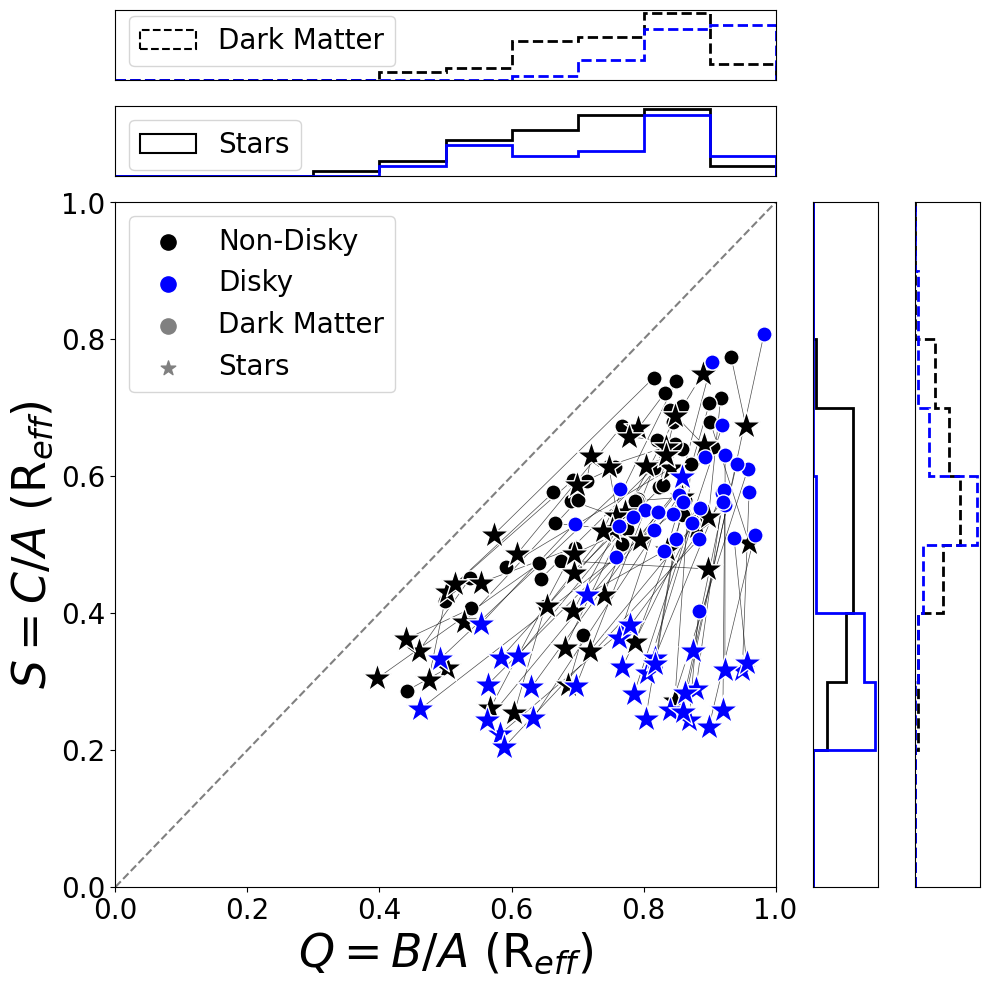

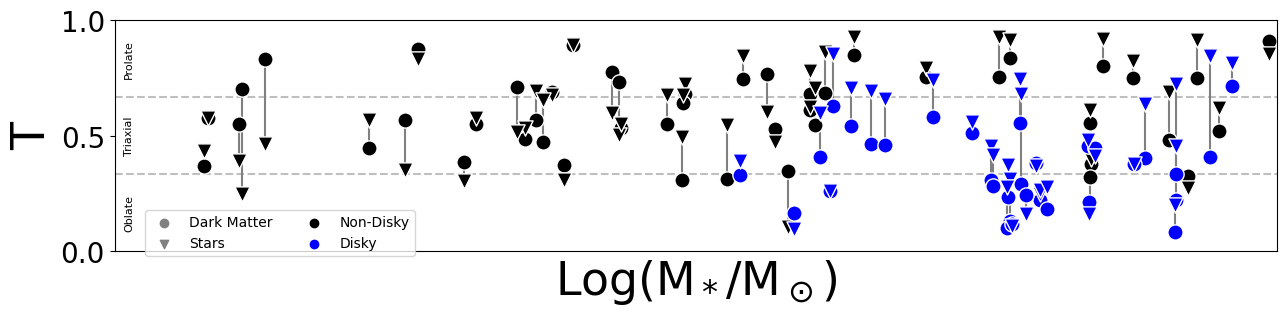

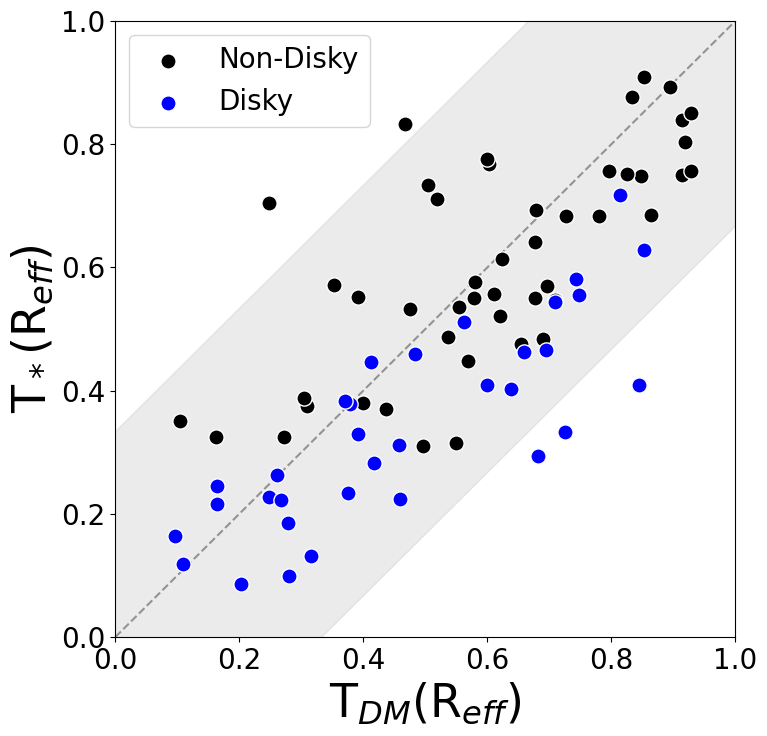

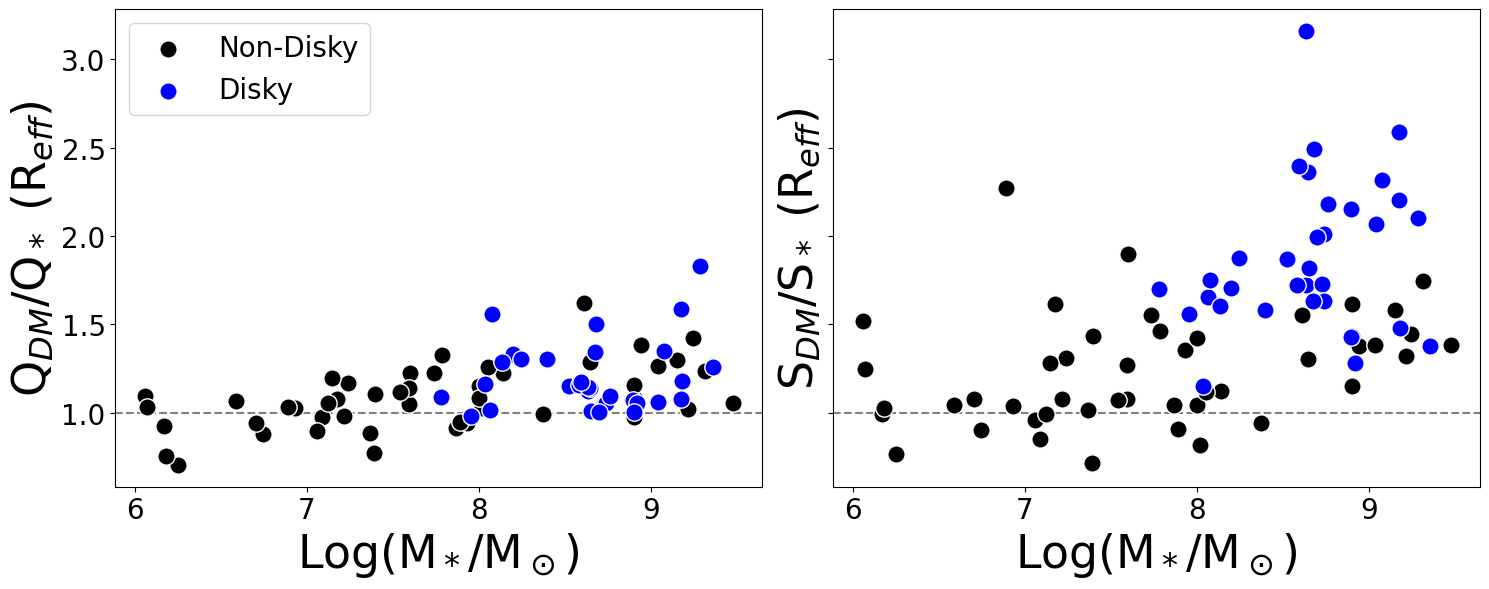

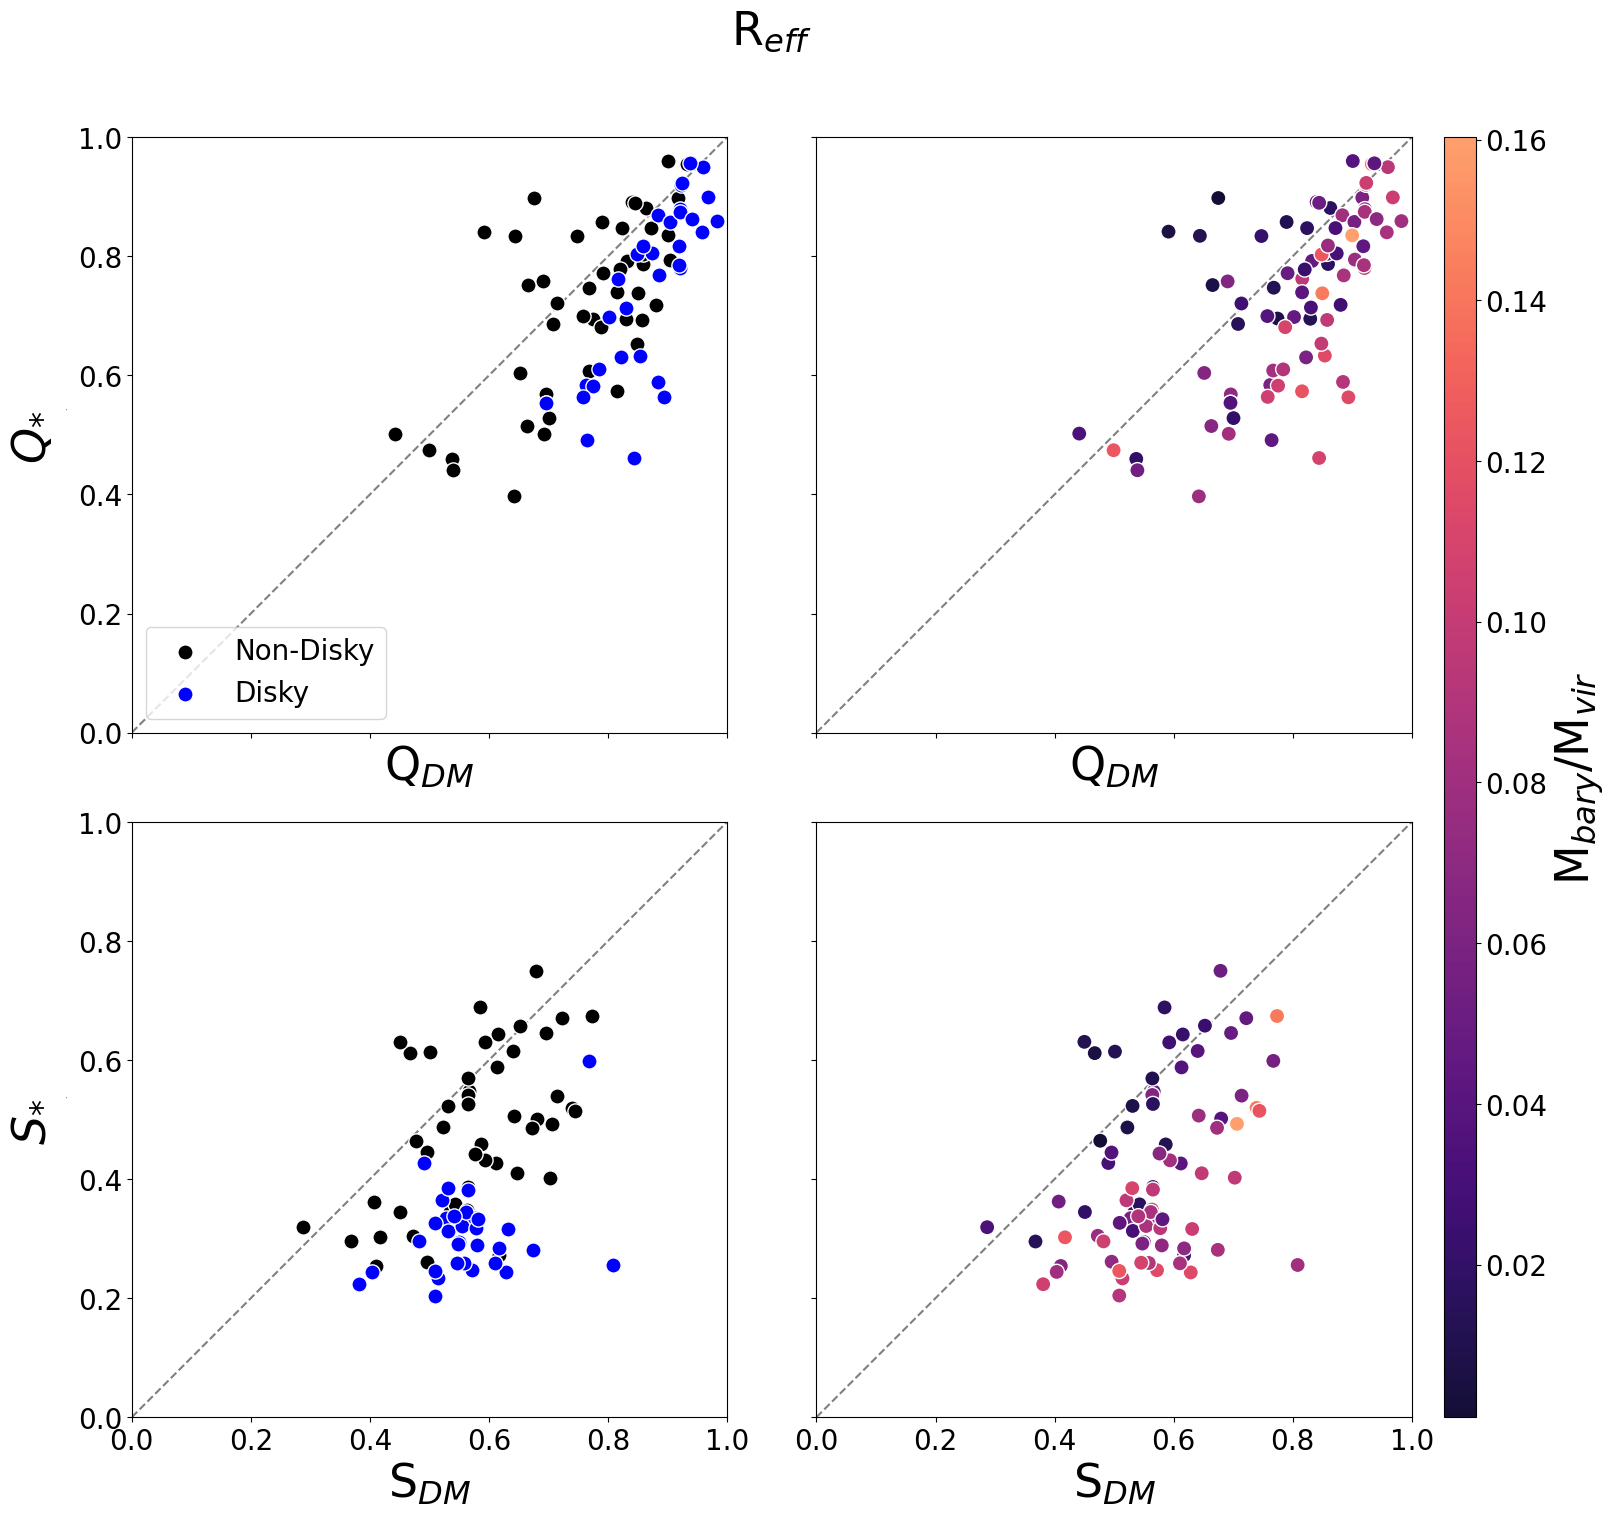

In [41]:

import PlotClasses
#display classes in PlotClasses
#print(dir(PlotClasses))
#reload(PlotClasses)
importlib.reload(PlotClasses)
importlib.reload(sdt)

for reff_multi in [1]:
    B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,mb_reff,mb_10rvir,htype,reff,mvir,feedback_type,sims,hids,mergers,rvir,diffs_at_reff, jz_jcirc_avgs,t_dyn = sdt.LoadSimData(feedbacks,return_sims=True,reff_multi=reff_multi)
    
    #remove unphysical values where c > b
    mask = C_s > B_s
    B_s = B_s[~mask]
    C_s = C_s[~mask]
    T_s = T_s[~mask]
    B_d = B_d[~mask]
    C_d = C_d[~mask]
    T_d = T_d[~mask]
    masses = masses[~mask]
    mb = mb[~mask]
    mb_reff = mb_reff[~mask]
    mb_10rvir = mb_10rvir[~mask]
    htype = htype[~mask]
    reff = reff[~mask]
    mvir = mvir[~mask]
    feedback_type = feedback_type[~mask]
    sims = sims[~mask]
    hids = hids[~mask]
    #mergers = mergers[~mask]
    rvir = rvir[~mask]
    diffs_at_reff = diffs_at_reff[~mask]
    jz_jcirc_avgs = jz_jcirc_avgs[~mask]
    t_dyn = t_dyn[~mask]
    #print(len(sims))
    
    print(f'number in sample at reff_multi {reff_multi}: {len(sims)}')
    disk_sims = {}
    for feedback in feedbacks:
        # with open(f'galaxy_classifications_{feedback}.pickle', 'wb') as f:
        #     pickle.dump(classified_galaxies, f)
        try:
            with open(f'galaxy_classifications_{feedback}.pickle', 'rb') as f:
                classified_galaxies = pickle.load(f)
                disk_sims.update(classified_galaxies)
        except FileNotFoundError:
            print(f'File galaxy_classifications_{feedback}.pickle not found')
            continue


    #combine all classified galaxies


    mask = np.zeros(len(sims), dtype=bool)
    disk_mask = np.zeros(len(sims), dtype=bool)
    ellip_mask = np.zeros(len(sims), dtype=bool)
    irr_mask = np.zeros(len(sims), dtype=bool)

    for sim in disk_sims:
        for halo in disk_sims[sim]:
            disk_sim = disk_sims[sim][halo]
            # Find indices where both sims and hids match the current sim and halo
            indices = (sims == sim) & (hids == halo)
            #print(sim, halo, disk_sim)
            if disk_sim == 'd':
                disk_mask[indices] = True
            elif disk_sim == 'i':
                irr_mask[indices] = True
            elif disk_sim == 'e':
                ellip_mask[indices] = True
            else:
                print('Error: disk_sim not recognized')
                print(sim, halo)
                print(disk_sim)
                break



    #Usage example:
    folder = '/home/bk639/OverLeaf/ShapePaper/figures/'
    disky_mask = disk_mask
    data_plot = {
        'B_s': B_s, 'C_s': C_s, 'T_s': T_s, 'B_d': B_d, 'C_d': C_d, 'T_d': T_d,
        'masses': masses, 'mb': mb, 'htype': htype, 'reff': reff, 'mvir': mvir,'reff_multi':reff_multi
    }
    masks = {'non-disky': ~disk_mask, 'disky': disk_mask}
    labels = {'non-disky': 'Non-Disky', 'disky': 'Disky', 'B': 'Q', 'C': 'S'}
    colors = {'non-disky': 'k', 'disky': 'blue'}

    plotter = PlotClasses.GeneralPlotter(data_plot, masks, labels, colors)
    plotter.plot_data_with_masks('B', 'C', show_lines=True, show_scatter=True, filename=folder +  f'SvQ_disky.{reff_multi}.png')
    plotter.calculate_shape_diff()
    plotter.plot_triaxiality_vs_mass(filename=folder + f'T_vs_Mass_disky.{reff_multi}.png')
    plotter.plot_T_stellar_vs_dark(filename=folder + f'T_stellar_vs_dark_matter_disky.{reff_multi}.png')
    plotter.plot_Mstar_V_b_d_b_s_V_c_d_c_s(filename= folder + f'Mstar_V_b_d_b_s_V_c_d_c_s_disky.{reff_multi}.png')
    plotter.plot_q_s_q_d(filename=folder + f'q_s_q_d_and_s_s_s_d.{reff_multi}.png')



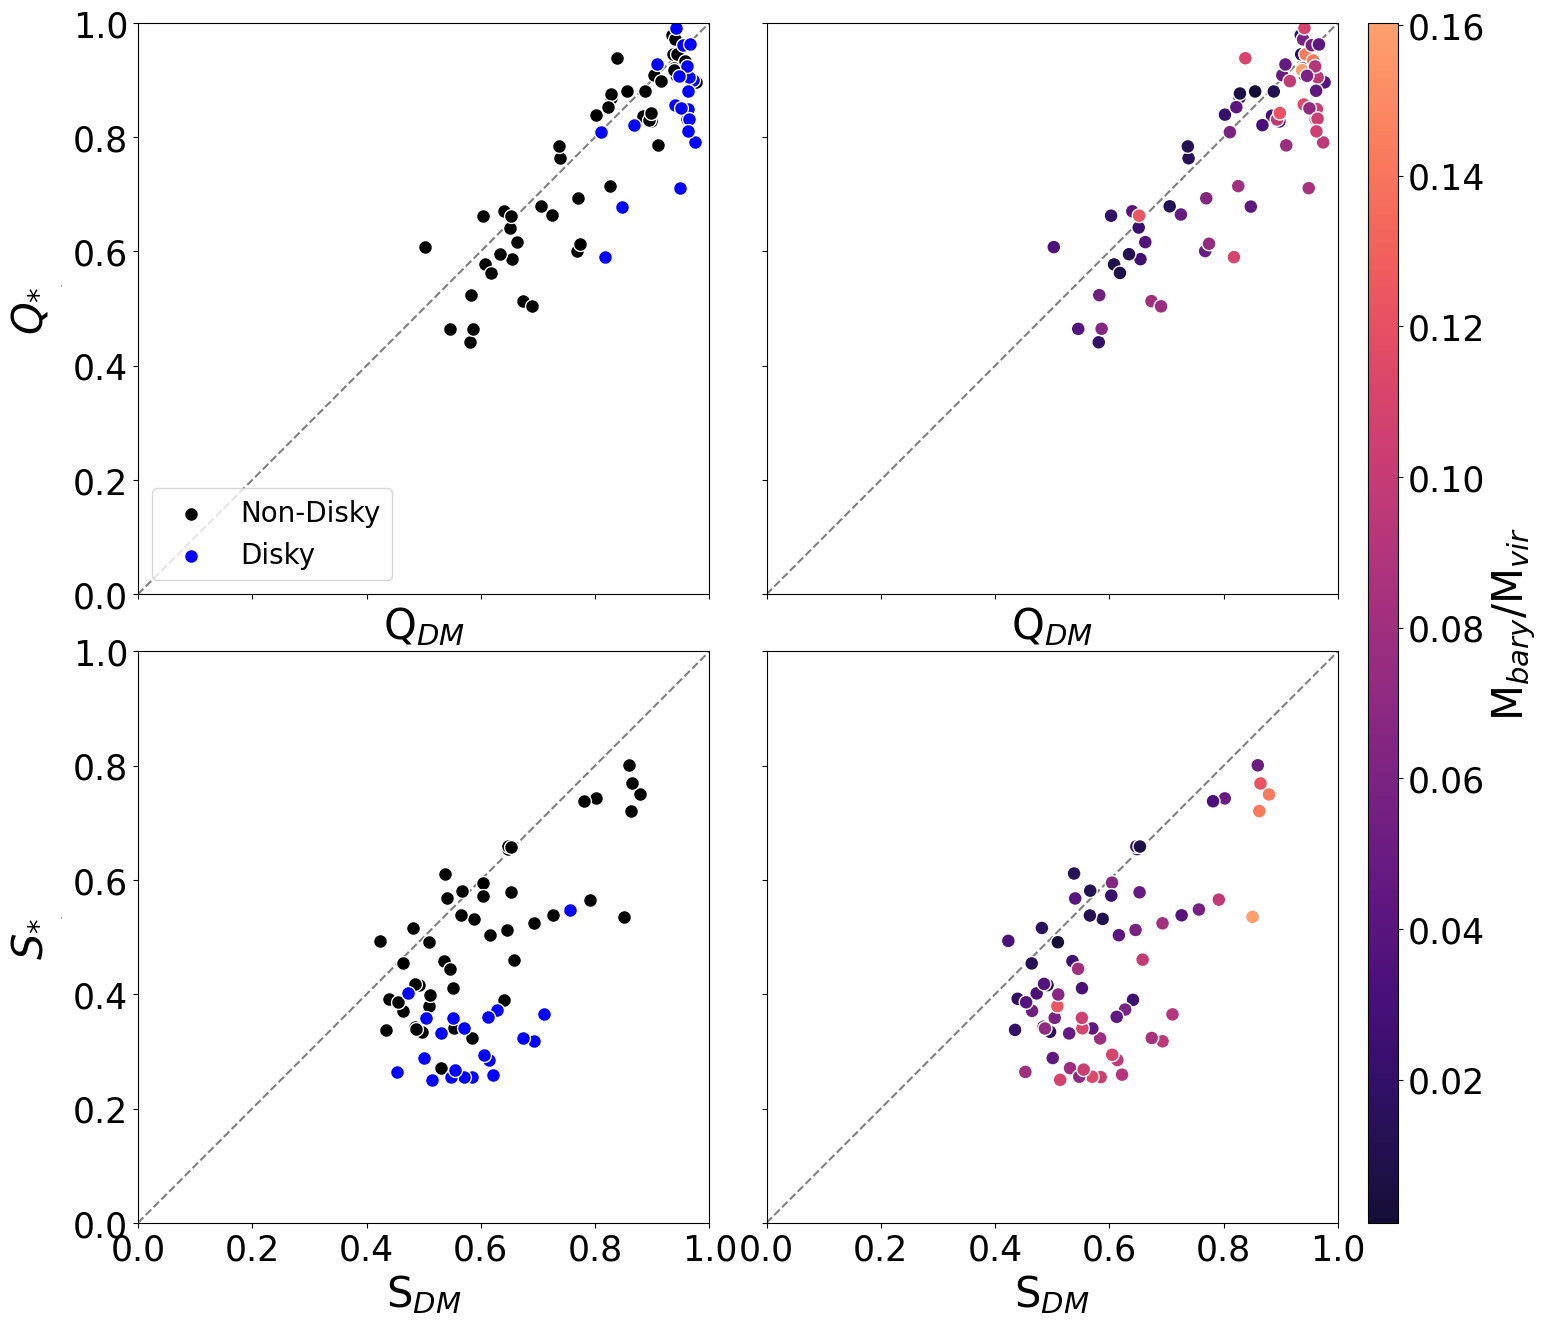

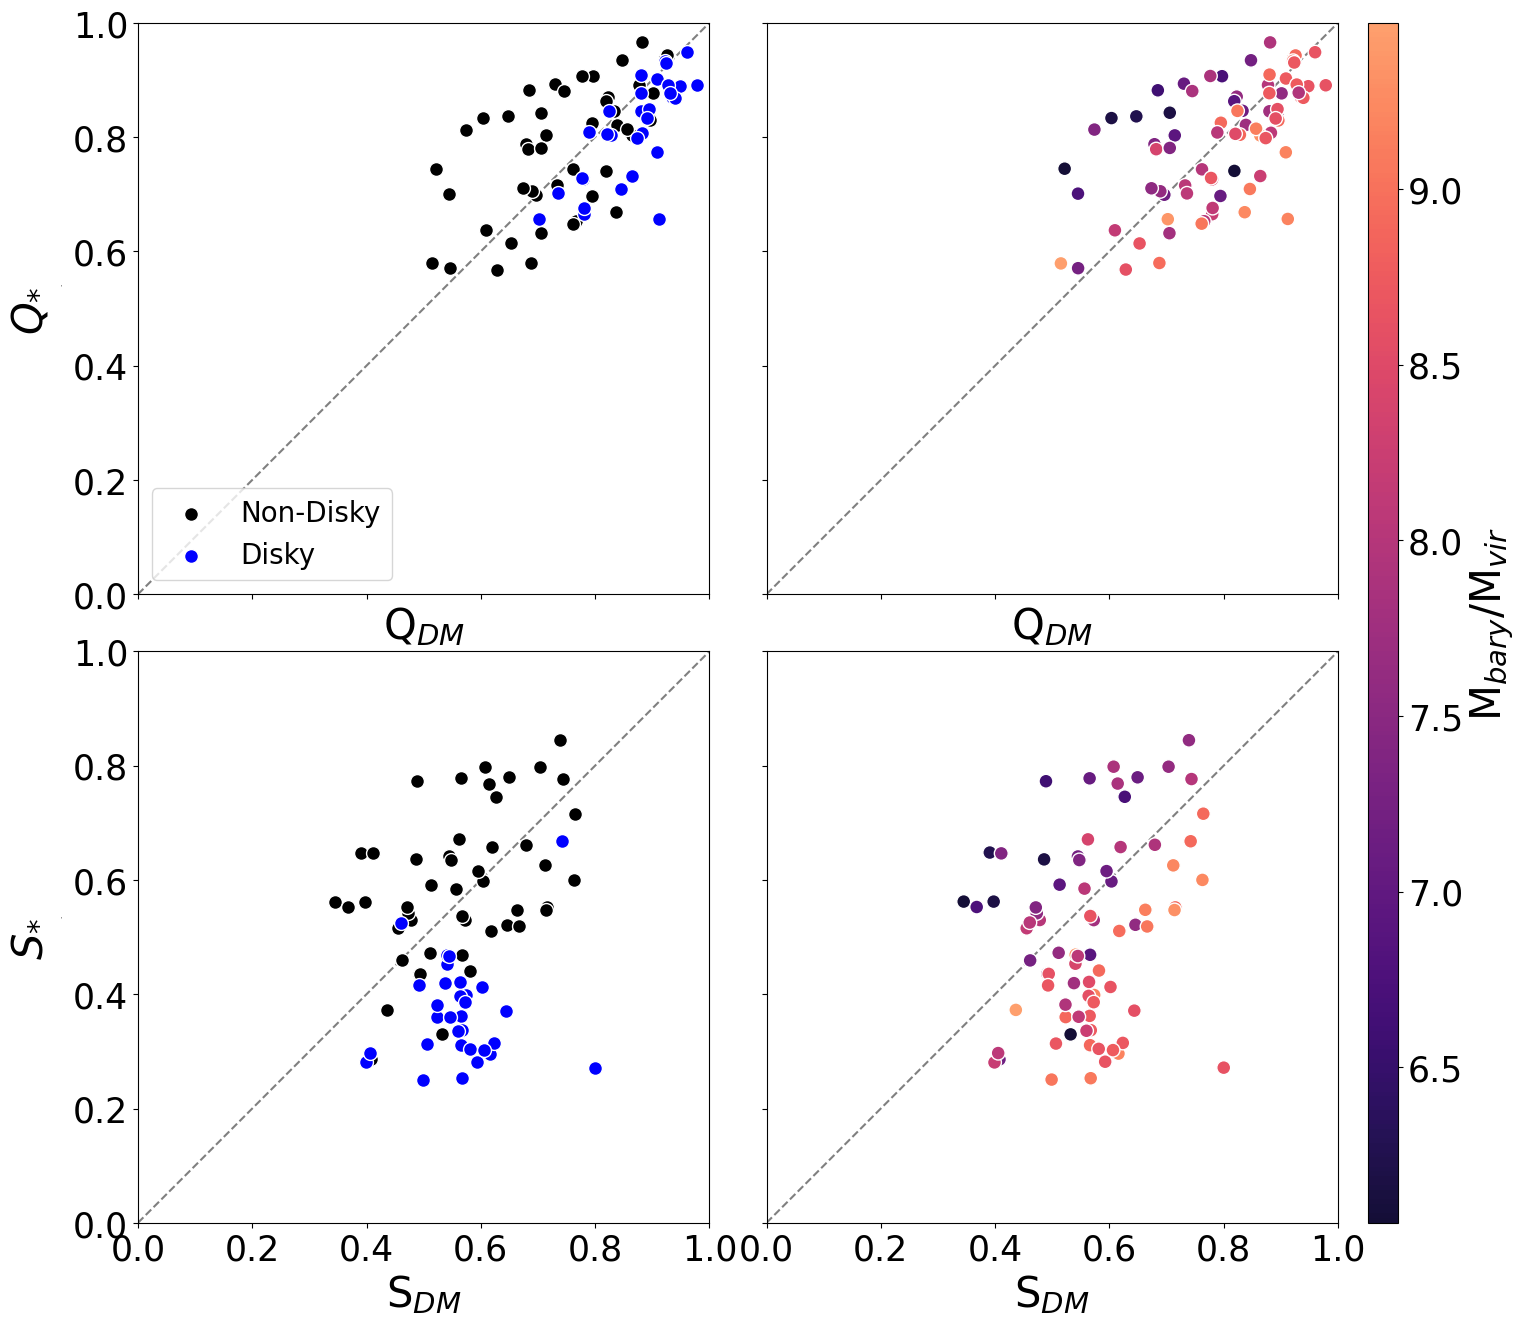

In [230]:

plotter.plot_q_s_q_d(filename=folder + 'q_s_q_d_and_s_s_s_d.png')

/home/bk639/miniconda3/envs/shapes/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


 galaxies: B_D/B_* mean: 1.01, std: 0.13
 galaxies: C_D/C_* mean: 1.23, std: 0.43
 galaxies: T_D/T_* mean: 1.08, std: 0.40


/home/bk639/MorphologyMeasurements/Code/PlotClasses.py:220: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  
/home/bk639/MorphologyMeasurements/Code/PlotClasses.py:243: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  if filename:


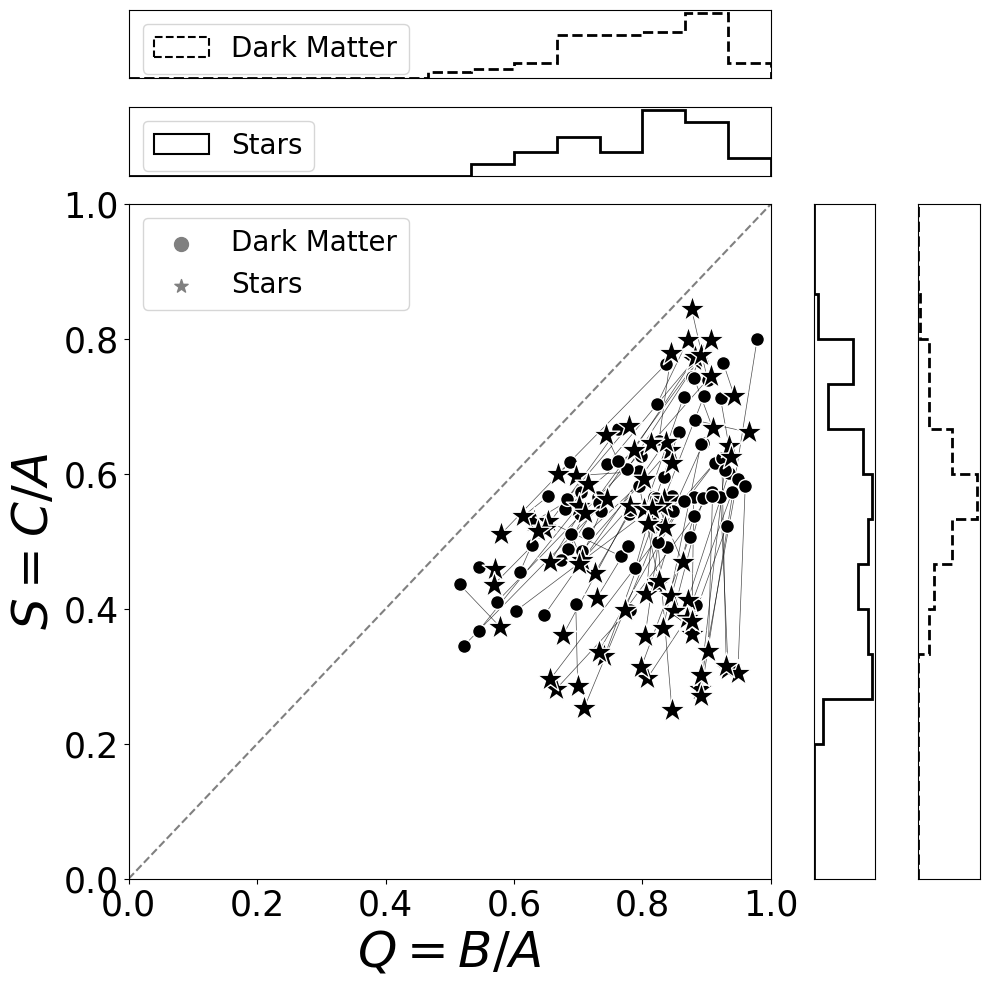

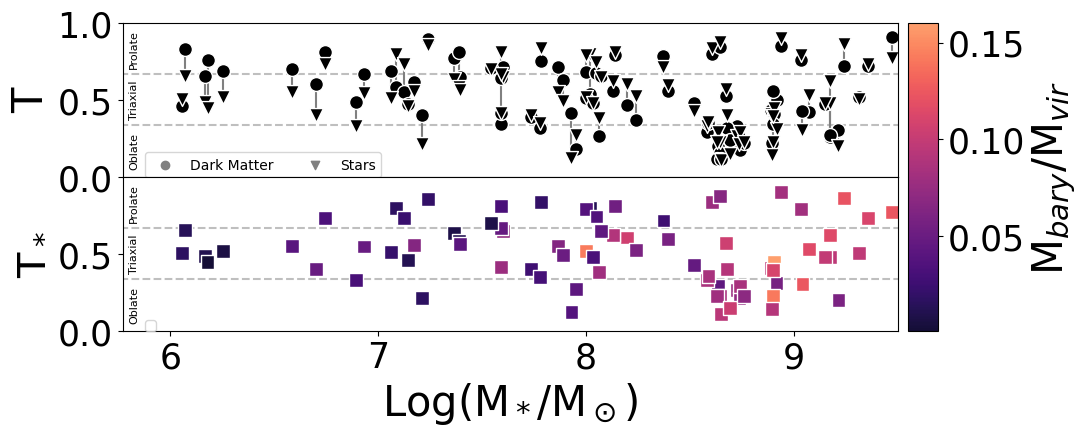

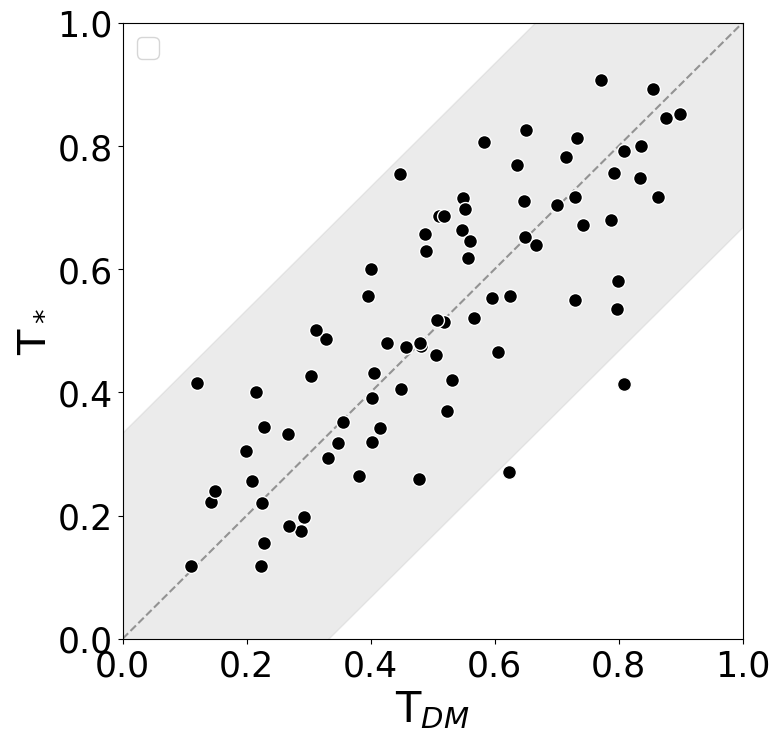

In [101]:
import PlotClasses
#display classes in PlotClasses
#print(dir(PlotClasses))
#reload(PlotClasses)
importlib.reload(PlotClasses)
#Usage example:
folder = '/home/bk639/OverLeaf/ShapePaper/figures/'
filename = 'SvQ.png'
data_plot = {
    'B_s': B_s, 'C_s': C_s, 'T_s': T_s, 'B_d': B_d, 'C_d': C_d, 'T_d': T_d,
    'masses': masses, 'mb': mb, 'htype': htype, 'reff': reff, 'mvir': mvir
}
mask = np.ones(len(sims),dtype=bool)
#all data
masks = {'all': mask}
labels = {'all': '', 'B': 'Q', 'C': 'S'}
colors = {'all': 'k'}



plotter = PlotClasses.GeneralPlotter(data_plot, masks, labels, colors)
plotter.plot_data_with_masks('B', 'C', show_lines=True, show_scatter=True, filename=folder + filename)
plotter.calculate_shape_diff()
plotter.plot_triaxiality_vs_mass(filename=folder + 'T_vs_Mass.png')
plotter.plot_T_stellar_vs_dark(filename=folder + 'T_stellar_vs_dark_matter.png')
#plotter.plot_Mstar_V_b_d_b_s_V_c_d_c_s(filename= folder + 'Mstar_V_b_d_b_s_V_c_d_c_s_disky.png')

In [102]:
#recreate previous plots only for feedback type MerianCDM only split into disk and non-disk galaxies
folder = '/home/bk639/OverLeaf/ShapePaper/figures/'
filename = 'SvQ_MerianCDM.png'
feedback_type_mask = feedback_type == 'MerianCDM'
data_plot = {
    'B_s': B_s, 'C_s': C_s, 'T_s': T_s, 'B_d': B_d, 'C_d': C_d, 'T_d': T_d,
    'masses': masses, 'mb': mb_reff, 'htype': htype, 'reff': reff, 'mvir': mvir
}

print(len(feedback_type_mask))
for key in data_plot.keys():
    data_plot[key] = data_plot[key][feedback_type_mask]
disk_mask = disk_mask[feedback_type_mask]
ellip_mask = ellip_mask[feedback_type_mask]
masks = {'disky': disk_mask, 'non-disky': ~disk_mask}
labels = {'disky': 'Disky', 'non-disky': 'Non-Disky', 'B': 'Q', 'C': 'S'}
colors = {'disky': 'green', 'non-disky': 'k'}


79


/home/bk639/miniconda3/envs/shapes/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Disky galaxies: B_D/B_* mean: 1.07, std: 0.09
Non-Disky galaxies: B_D/B_* mean: 1.06, std: 0.10
Disky galaxies: C_D/C_* mean: 1.73, std: 0.43
Non-Disky galaxies: C_D/C_* mean: 1.14, std: 0.15
Disky galaxies: T_D/T_* mean: 0.95, std: 0.31
Non-Disky galaxies: T_D/T_* mean: 1.00, std: 0.15


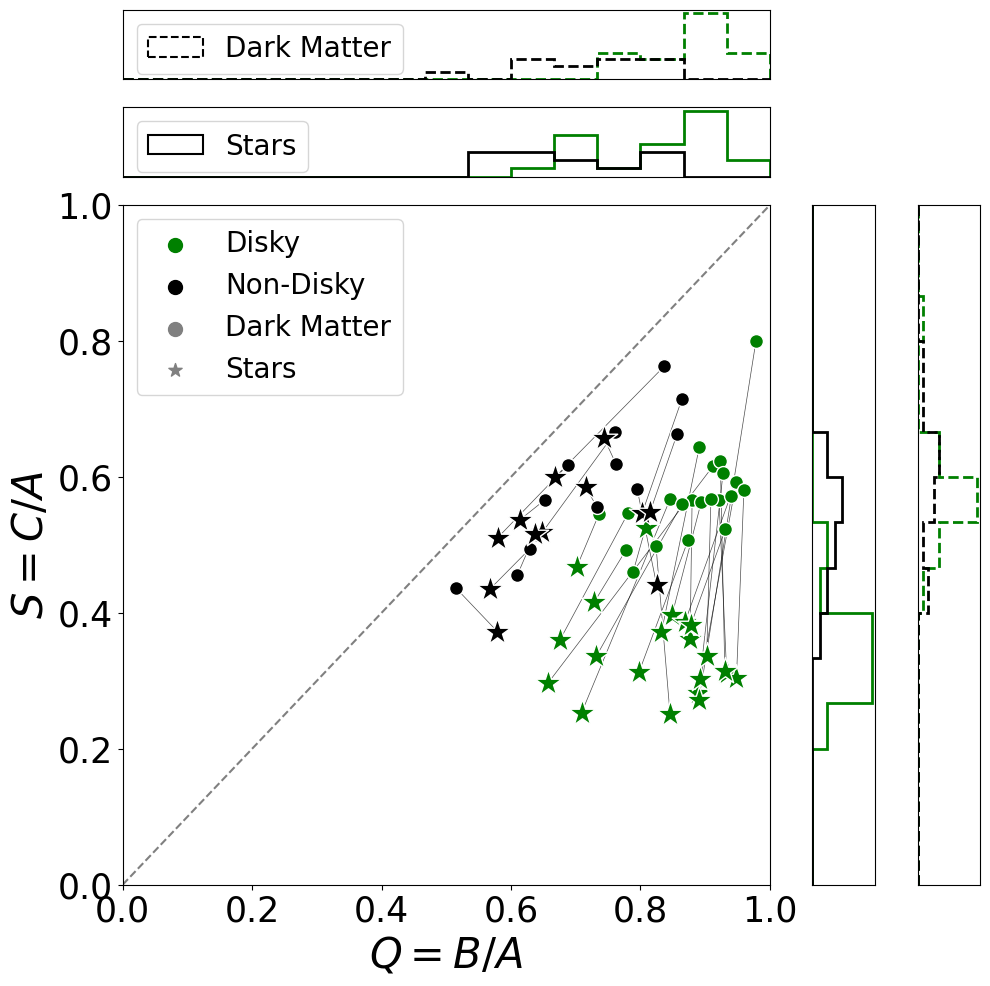

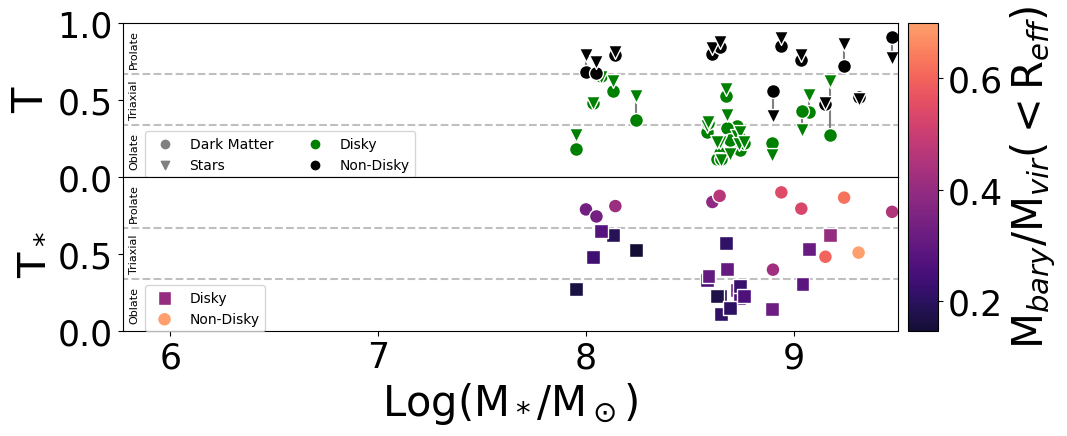

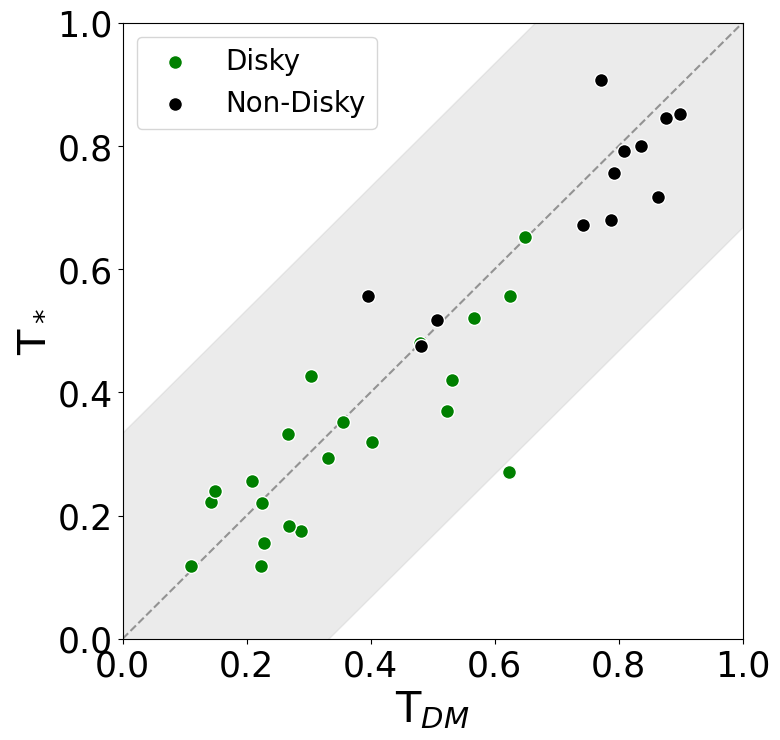

In [75]:
importlib.reload(PlotClasses)
plotter = PlotClasses.GeneralPlotter(data_plot, masks, labels, colors)
plotter.plot_data_with_masks('B', 'C', show_lines=True, show_scatter=True, filename=folder + filename)
plotter.calculate_shape_diff()
plotter.plot_triaxiality_vs_mass(filename=folder + 'T_vs_Mass_disky_Merian.png')
plotter.plot_T_stellar_vs_dark(filename=folder + 'T_stellar_vs_dark_matter_disky.png')

In [ ]:
#reload PlotClasses
importlib.reload(PlotClasses)

plotter.plot_Mstar_V_b_d_b_s_V_c_d_c_s()

In [ ]:

#plot B_dm/B_star and C_dm/C_star
fig, ax = plt.subplots(1, 2, figsize=(20, 12), sharey=True)
#share y axis
ax[0].set_ylim([0.5, 2.5])

ax[0].scatter(data_plot['masses'][disk_mask], data_plot['B_s'][disk_mask]/data_plot['B_d'][disk_mask], label='Disky', color='g')
ax[0].scatter(data_plot['masses'][ellip_mask], data_plot['B_s'][ellip_mask]/data_plot['B_d'][ellip_mask], label='Non-Disky', color='k')
ax[0].set_xlabel('Stellar Mass')
ax[0].set_ylabel('B_dm/B_star')
ax[0].legend()
ax[1].scatter(data_plot['masses'][disk_mask], data_plot['C_d'][disk_mask]/data_plot['C_s'][disk_mask], label='Disky', color='g')
ax[1].scatter(data_plot['masses'][ellip_mask], data_plot['C_d'][ellip_mask]/data_plot['C_s'][ellip_mask], label='Non-Disky', color='k')
ax[1].set_xlabel('Stellar Mass')
ax[1].set_ylabel('C_dm/C_star')
ax[1].legend()

data_plot['B_dm/B_star'] = data_plot['B_s']/data_plot['B_d']
data_plot['C_dm/C_star'] = data_plot['C_d']/data_plot['C_s']

#sns.regplot(x = data_plot['masses'][disk_mask], y = data_plot['B_dm/B_star'][disk_mask], ax = ax[0], color = 'b',)
#sns.regplot(x = data_plot['masses'][ellip_mask], y = data_plot['B_dm/B_star'][ellip_mask], ax = ax[0], color = 'r', )
#sns.regplot(x = data_plot['masses'][disk_mask], y = data_plot['C_dm/C_star'][disk_mask], ax = ax[1], color = 'b',)
#sns.regplot(x = data_plot['masses'][ellip_mask], y = data_plot['C_dm/C_star'][ellip_mask], ax = ax[1], color = 'r',)

#add grid
ax[0].grid()
ax[1].grid()

#all data fit
#sns.regplot(x = data_plot['masses'], y = data_plot['B_dm/B_star'], ax = ax[0])
#sns.regplot(x = data_plot['masses'], y = data_plot['C_dm/C_star'], ax = ax[1])




#share y axis





In [ ]:

#create histogram of diffs_at_reff for disky and non-disky
fig, ax = plt.subplots(3, 1, figsize=(6, 8))
bins = np.linspace(0, 90, 10)
angle_labels = ['A', 'B', 'C']
for i in range(3):
    ax[i].hist(diffs_at_reff[:, i][disk_mask], bins=bins, alpha=.5, label='Disky', color='g', histtype='step', lw=2)
    ax[i].hist(diffs_at_reff[:, i][ellip_mask], bins=bins, alpha=.5, label='Non-Disky', color='k', histtype='step', lw=2)
    ax[i].set_title(f'Angular Difference in {angle_labels[i]} axis')
    print(np.sum(diffs_at_reff[:, i] < 30) / len(diffs_at_reff[:, i][disk_mask]))

plt.subplots_adjust(hspace=0.5)  # Adjust the spacing between plots
plt.show()

#recreate plot but with only galaxies that low diffs_at_reff[:,2] < 10
fig, ax = plt.subplots(3, 1, figsize=(6, 8))
bins = np.linspace(0, 90, 10)
angle_labels = ['A', 'B', 'C']
filter = diffs_at_reff[:, 2] < 10
for i in range(3):
    ax[i].hist(diffs_at_reff[:, i][disk_mask & filter], bins=bins, alpha=.5, label='Disky', color='g', histtype='step', lw=2)
    ax[i].hist(diffs_at_reff[:, i][ellip_mask & filter], bins=bins, alpha=.5, label='Non-Disky', color='k', histtype='step', lw=2)
    ax[i].set_title(f'Angular Difference in {angle_labels[i]} axis')
    print(np.sum(diffs_at_reff[:, i] < 10) / len(diffs_at_reff[:, i][disk_mask]))

plt.subplots_adjust(hspace=0.5)  # Adjust the spacing between plots

plt.show()

In [ ]:

#print number of galaxies with angular difference less than 30 degrees for disky and non-disky
#for each angle component
cutoff = 10
for i in range(3):
    print(i)
    print(f'Number of galaxies with angular difference less than {cutoff} degrees for disky in axis        |: {np.sum(diffs_at_reff[:, i][disk_mask] < cutoff)} out of {sum(disk_mask)}')
    print(f'Number of galaxies with angular difference less than {cutoff} degrees for non-disky in axis    |: {np.sum(diffs_at_reff[:, i][ellip_mask] < cutoff)} out of {sum(ellip_mask)}')
    print(f'Number of galaxies with angular difference less than {cutoff} degrees for all galaxies in axis |: {np.sum(diffs_at_reff[:, i] < cutoff)} out of {len(diffs_at_reff[:, i])}')





In [280]:

folder = '/home/bk639/OverLeaf/ShapePaper/figures/'
filename = 'SvQ_plain.png'
feedback_type_mask = feedback_type == 'MerianCDM'
labels = {'MerianCDM': 'Merians', 'BWMDC': 'Marvel + DCJL', 'B': 'Q', 'C': 'S'}
# colors = {'MerianCDM': 'r', 'BWMDC': 'b'}
# masks = {'MerianCDM': feedback_type_mask, 'BWMDC': ~feedback_type_mask}
colors = {'Full Sample': 'k'}
masks = {'Full Sample': np.ones(len(feedback_type),dtype=bool)}
labels = {'Full Sample': 'All', 'B': 'Q', 'C': 'S'}

#print sample stats.
#total number of galaxies
print(f'Total number of galaxies: {len(feedback_type)}')
#number of MerianCDM galaxies
print(f'Number of MerianCDM galaxies: {np.sum(feedback_type == "MerianCDM")}')
#number of BWMDC galaxies
print(f'Number of BWMDC galaxies: {np.sum(feedback_type == "BWMDC")}')

#number of marvel galaxies with sim names cptmarvel, storm, rogue, elektra
print(f'Number of Marvel galaxies: {np.sum(marvel_mask)}')
#number of DCJL galaxies with sim names h148, h229, h242, h329
print(f'Number of DCJL galaxies: {np.sum(DCJL_mask)}')

#number of satellites and centrals
print(f'Number of satellites: {np.sum(htype == "v")}')
print(f'Number of centrals: {np.sum(htype == "o")}')
#number of disk galaxies
print(f'Number of disk galaxies: {np.sum(disk_mask)}')
#number of elliptical galaxies
print(f'Number of elliptical galaxies: {np.sum(ellip_mask)}')
#number of irregular galaxies
print(f'Number of irregular galaxies: {np.sum(irr_mask)}')

print(f'Number of Merging galaxies in the last 700Myr: {4}')

#print range of dynamical times of merging galaxies r615 halo 1 , r618 halo 1, elektra halo 3, storm halo 4, rogue halo 1, h148 halo 3
merging_galaxies = {'r615': 1, 'r618': 1, 'elektra': 3, 'storm': 4, 'rogue': 1, 'h148': 3}
for sim, halo in merging_galaxies.items():
    indices = (sims == sim) & (hids == halo)
    print(f'{sim} halo {halo} has dynamical time of {t_dyn[indices][0]*1000:.2f} Myr')

#print range of all dynamical times
print(f'Minimum dynamical time: {np.min(t_dyn)*1000:.2f} Myr')
print(f'Maximum dynamical time: {np.max(t_dyn)*1000:.2f} Myr')



Total number of galaxies: 81
Number of MerianCDM galaxies: 35
Number of BWMDC galaxies: 46
Number of Marvel galaxies: 32
Number of DCJL galaxies: 14
Number of satellites: 13
Number of centrals: 68
Number of disk galaxies: 33
Number of elliptical galaxies: 46
Number of irregular galaxies: 2
Number of Merging galaxies in the last 700Myr: 4
r615 halo 1 has dynamical time of 198.12 Myr
r618 halo 1 has dynamical time of 124.02 Myr
elektra halo 3 has dynamical time of 221.19 Myr
storm halo 4 has dynamical time of 579.46 Myr
rogue halo 1 has dynamical time of 84.50 Myr
h148 halo 3 has dynamical time of 770.25 Myr
Minimum dynamical time: 53.35 Myr
Maximum dynamical time: 1389.24 Myr


In [268]:
print(sims)

['cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel'
 'elektra' 'elektra' 'elektra' 'elektra' 'elektra' 'elektra' 'elektra'
 'storm' 'storm' 'storm' 'storm' 'storm' 'storm' 'storm' 'storm' 'storm'
 'storm' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue'
 'rogue' 'h148' 'h148' 'h148' 'h148' 'h148' 'h148' 'h148' 'h148' 'h229'
 'h229' 'h229' 'h229' 'h242' 'h242' 'r431' 'r442' 'r468' 'r488' 'r489'
 'r492' 'r502' 'r515' 'r523' 'r544' 'r552' 'r555' 'r556' 'r563' 'r568'
 'r569' 'r571' 'r597' 'r613' 'r614' 'r615' 'r618' 'r634' 'r642' 'r656'
 'r716' 'r718' 'r753' 'r761' 'r850' 'r852' 'r886' 'r916' 'r918' 'r977']


In [ ]:

sim = 'r615'
halo = 1
indices = (sims == sim) & (hids == halo)
#print stellar mass, virial mass, dynamical time, virial radius, effective radius, baryonic fraction within virial radius, baryonic fraction within effective radius
print(f'{sim} halo {halo} has stellar mass of {masses[indices]}, virial mass of {mvir[indices]}, dynamical time of {t_dyn[indices]}, virial radius of {rvir[indices]}, effective radius of {reff[indices]}, baryonic fraction within virial radius of {mb[indices]}, baryonic fraction within effective radius of {mb_reff[indices]}')


In [ ]:
sim = 'r618'
halo = 1
indices = (sims == sim) & (hids == halo)
#print stellar mass, virial mass, dynamical time, virial radius, effective radius, baryonic fraction within virial radius, baryonic fraction within effective radius
print(f'{sim} halo {halo} has stellar mass of {masses[indices]}, virial mass of {mvir[indices]}, dynamical time of {t_dyn[indices]}, virial radius of {rvir[indices]}, effective radius of {reff[indices]}, baryonic fraction within virial radius of {mb[indices]}, baryonic fraction within effective radius of {mb_reff[indices]}')


In [ ]:

plotter = PlotClasses.GeneralPlotter(data, masks, labels, colors)
plotter.plot_data_with_masks('B', 'C', show_lines=True, show_scatter=True, filename=folder + filename)
plotter.calculate_shape_diff()
plotter.plot_triaxiality_vs_mass(filename=folder + 'T_vs_Mass.png')
plotter.plot_T_stellar_vs_dark(filename=folder + 'T_stellar_vs_dark_matter.png')
plotter.calculate_shape_diff()



In [ ]:
folder = '/home/bk639/OverLeaf/ShapePaper/figures/'
filename = 'SvQ_sat.png'
sattellite_mask = htype == 'o'
labels = {'sattellite': 'Sattellite', 'central': 'Central', 'B': 'Q', 'C': 'S'}
colors = {'sattellite': 'gray', 'central': 'orange'}
masks = {'sattellite': sattellite_mask, 'central': ~sattellite_mask}


plotter = PlotClasses.GeneralPlotter(data, masks, labels, colors)
plotter.plot_data_with_masks('B', 'C', show_lines=True, show_scatter=True, filename=folder + filename)
plotter.calculate_shape_diff()
plotter.plot_triaxiality_vs_mass()
plotter.calculate_shape_diff()


In [ ]:

import importlib
importlib.reload(sdt)
sdt.MvC_diffBdiff_disks(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type, disk_mask, mergers=None)

In [ ]:
#load pickle files f'../../Data/MergerShapes.{feedback}.pickle', 'wb'))
feedbacks = ['MerianCDM']
fig,ax = plt.subplots(1,1,figsize=(8,8))
for feedback in feedbacks:
    mergers = pickle.load(open(f'../../Data/MergerShapes.{feedback}.pickle', 'rb'))
    for sim in mergers:
        for halo in mergers[sim]:
            colors = ['r','b','g']
            for snapshot,color in zip(mergers[sim][halo],colors):
                B_s = mergers[sim][halo][snapshot]['ba_s_smoothed_at_Reff']
                C_s = mergers[sim][halo][snapshot]['ca_s_smoothed_at_Reff']
                B_d = mergers[sim][halo][snapshot]['ba_d_smoothed_at_Reff']
                C_d = mergers[sim][halo][snapshot]['ca_d_smoothed_at_Reff']
                T_s = T(B_s,C_s)
                T_d = T(B_d,C_d)
                ax.scatter(B_s,C_s,c=color,marker='*',label='Stellar')
                ax.scatter(B_d,C_d,c=color,marker='o',label='Dark Matter')
                ax.plot([B_s,B_d],[C_s,C_d],c=color)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel('B/A')
ax.set_ylabel('C/A')
ax.set_title('Merger Shapes')
ax.legend()
plt.show()

                
                

In [ ]:
print(sims)

In [ ]:
distances = np.sqrt((B_d - B_s)**2 + (C_d - C_s)**2)
T_diff = T_d - T_s
print('all data')
mean_T_diff, std_T_diff, mean_distances, std_distances = sdt.analyze_distances(T_diff, distances, condition=None)
print('disky')
mean_T_diff, std_T_diff, mean_distances, std_distances = sdt.analyze_distances(T_diff, distances, condition=mask)
print('non-disky')
mean_T_diff, std_T_diff, mean_distances, std_distances = sdt.analyze_distances(T_diff, distances, condition=~mask)

In [ ]:
import importlib
importlib.reload(sdt)


#sdt.plot_data(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type,condition=None)


In [ ]:


print((mask))

# B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,sims,hids,mergers = B_s[~mask],C_s[~mask],T_s[~mask],B_d[~mask],C_d[~mask],T_d[~mask],masses[~mask],mb[~mask],htype[~mask],reff[~mask],mvir[~mask],feedback_type[~mask],sims[~mask],hids[~mask],mergers[~mask]



In [ ]:
print(mergers.shape)
#print non [[nan, nan ]] mergers
# but do print [[nan, float]] mergers
print(mergers[~np.isnan(mergers).all(axis=2)])


In [ ]:
import importlib
importlib.reload(sdt)
from StellarDMTracing import colors

In [ ]:
plt.style.use('default')
sdt.T_vs_Mstar(T_d,T_s,masses,mb_reff,htype,feedback_type)


In [ ]:
sdt.plot_data(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type,mergers,show_lines=True) 


In [ ]:
sdt.T_vs_Tdm(T_d, T_s,masses,htype,feedback_type,legend = ['Marvel+DCJL','Merians'],label = 'CDM')

In [ ]:
plt.style.use('default')

def axis_difference(d,s):
    #absolote difference
    #return d-s
    #relative difference
    avg = np.average([d, s], axis=0)
    #return (d-s)/avg
    #ratio
    return d/s

fig,axes = plt.subplots(1,2,figsize=(20,10))
ax = axes[0]
#ax.set_ylim([.4,2.4])

c_ratio = axis_difference(C_d,C_s)
# now plotting ratio of C_d/C_s
ylabel = r'$C_{DM}/C_{*}$'
#ylabel = r'$\Delta C = \frac{C_{DM} - C_{*}}{\bar{C}}$'
sdt.plot_DM_S_axes_diffs(ax,c_ratio,masses,feedback_type,ylabel)

axes[1].sharey(axes[0])

ax=axes[1]
b_ratio = axis_difference(B_d,B_s)
ylabel = r'$B_{DM}/B_{*}$'
#ylabel = r'$\Delta B = \frac{B_{DM} - B_{*}}{\bar{B}}$'

import seaborn as sns

def plot_DM_S_axes_diffs(ax,c_diff,masses,feedback_type,ylabel):

    ax.scatter(masses[feedback_type == 'MerianCDM'], c_diff[feedback_type == 'MerianCDM'], label='Merians')
    #ax.scatter(masses[feedback_type == 'BWMDC'], c_diff[feedback_type == 'BWMDC'], label='Marvel+DCJL',
     #          c=colors['BWMDC'])
    # plot y = 0 line
    ax.axhline(1, c='k', linestyle='-', alpha=.5)
    ax.set_xlabel(r'Log(M$_*$/M$_\odot$)', fontsize=25)
    ax.set_ylabel(ylabel, fontsize=25)
    ax.legend(loc='upper left', prop={'size': 20})
    # linear fit and show error on plot
    # increase tick size and font
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)

    # sns.regplot(x=masses[feedback_type=='MerianCDM'],y=c_diff[feedback_type=='MerianCDM'],ax=ax,scatter=False)
    # sns.regplot(x=masses[feedback_type=='BWMDC'],y=c_diff[feedback_type=='BWMDC'],ax=ax,scatter=False)
    sns.regplot(x=masses, y=c_diff, ax=ax, scatter=False, color='k', label='Linear Fit')
    # get linear fit parameters using scipy.stats.linregress
    from scipy.stats import linregress
    LinregressResult = linregress(masses, c_diff)
    slope = LinregressResult.slope
    intercept = LinregressResult.intercept
    rv = LinregressResult.rvalue
    pval = LinregressResult.pvalue
    stderr = LinregressResult.stderr
    intercept_stderr = LinregressResult.intercept_stderr
    print(
        f'slope: {slope}, intercept: {intercept}, r: {rv}, pval: {pval}, stderr: {stderr}, intercept_stderr: {intercept_stderr}')

    # plot linear fit
    x = np.linspace(6, 9.5, 100)
    y = slope * x + intercept
    # ax.plot(x,y,c='k',linestyle='--',label='Linear Fit')
    # add confidence interval from both slope error and intercept error


#ax.text(6.5,.2,r'$\Delta C = {slope:.2f}M_* + {intercept:.2f}$',fontsize=15)
fig.savefig(f'../../Figures/3DShapes/MvC_diff.png',bbox_inches='tight',pad_inches=.1,dpi = 300)

#create a similar plot but instead of mass use m_b/m_vir within Reff as x axis
#also try plotting disky vs nondisky for colors instead of feedback type
#change labels to Q and S instead of B and C






In [ ]:
plot_DM_S_axes_diffs(ax,b_ratio,masses,feedback_type,ylabel)

In [ ]:
import astropy
#test astropy
print(astropy.__version__)

In [ ]:
from astropy import units as u
from astropy import constants as const
import numpy as np

def calculate_dynamical_time(r_vir, M_halo):
    # Convert input parameters to Astropy quantities
    r_vir = r_vir * u.kpc
    M_halo = M_halo * u.solMass
    r_vir = r_vir.to(u.kpc)
    M_halo = M_halo.to(u.solMass)

    # Calculate dynamical time
    t_dyn = np.sqrt(r_vir**3 / (const.G * M_halo))

    return t_dyn.to(u.Gyr)


t_dyn = []
# Calculate dynamical time for each galaxy
for i in range(len(rvir)):
    r_vir = rvir*10
    M_halo = mvir[i]
    t = calculate_dynamical_time(r_vir, M_halo)
    print(f'r_vir: {r_vir:.2f}, M_halo: {M_halo:.2e}, t_dyn: {t:.2f}')
    t_dyn.append(t.value)

In [ ]:
print(t_dyn)

In [ ]:

#get avg, std, min, max
t_dyn = np.array(t_dyn)
print(f'Average dynamical time: {np.mean(t_dyn):.2f}')
print(f'Standard deviation of dynamical time: {np.std(t_dyn):.2f}')
print(f'Minimum dynamical time: {np.min(t_dyn):.2f}')
print(f'Maximum dynamical time: {np.max(t_dyn):.2f}')





In [ ]:
mask = abs(T_d - T_s) < .05
#print(sum(mask))

#print(T_d[mask],T_s[mask],T_d[mask]-T_s[mask])

#look for repeated values in T_d and T_s
for i in range(len(T_d)):
    for j in range(i+1,len(T_d)):
        if T_d[i] == T_d[j] or T_s[i] == T_s[j]:
            print(i,j)
            print(T_d[i],T_s[i],T_d[j],T_s[j])




In [ ]:
SimFilePath = ['../PickleFiles/SimulationInfo.MerianCDM.pickle','../PickleFiles/SimulationInfo.MerianSIDM.pickle']
MassPath = ['../../Data/BasicData/MerianCDM.Masses.pickle','../../Data/BasicData/MerianSIDM.Masses.pickle']
HaloTypePath = ['../../Data/BasicData/HaloTypes.MerianCDM.txt','../../Data/BasicData/HaloTypes.MerianSIDM.txt']
feedback = ['MerianCDM','MerianSIDM']
B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,sims = sdt.LoadSimData(SimFilePath,MassPath,HaloTypePath,feedback,return_sims=True)

#main(B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,r[i])

In [ ]:
sdt.plot_SIDM_CDM(B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,sims)

In [ ]:
plt.rcParams['font.family'] = 'DejaVu Sans'

dpi = 300


#Convert lists to arrays for htype indexing
T_d,T_s,masses,mb,htype = np.array(T_d),np.array(T_s),np.array(masses),np.array(mb),np.array(htype)
B_s,C_s,B_d,C_d = np.array(B_s),np.array(C_s),np.array(B_d),np.array(C_d)

#T* vs Tdm
f,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.fill_between([0,1],[-1/3,2/3],[1/3,4/3],color='0.75',alpha=.3)
ax.plot([0,1],[0,1],c='0.5',linestyle='--')
ax.set_ylabel(r'T$_*$',fontsize=15)
ax.set_xlabel(r'T$_{DM}$',fontsize=15)

norm = plt.Normalize(int(min(masses)),int(max(masses))+.1)
p = ax.scatter(T_d[htype=='o'],T_s[htype=='o'],marker='o',c=masses[htype=='o'],cmap='viridis',norm=norm)
ax.scatter(T_d[htype=='v'],T_s[htype=='v'],marker='v',c=masses[htype=='v'],cmap='viridis',norm=norm,label='Satellites')
cbar = f.colorbar(p,cax=f.add_axes([.91,.11,.03,.77]))
cbar.set_label(r'Log(M$_*$/M$_\odot$)',fontsize=15)

ax.legend(loc='lower left',prop={'size':12})
f.savefig(f'../../Figures/3DShapes/T_Comparison.png',bbox_inches='tight',pad_inches=.1,dpi = dpi)

In [ ]:
#B/A vs C/A links
f,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
#ax.fill_between([0,1],[-.1,.9],[.1,1.1],color='0.75',alpha=.3)
ax.plot([0,1],[0,1],c='0.5',linestyle='--')
ax.set_xlabel(r'$S$',fontsize=20)
ax.set_ylabel(r'$Q$',fontsize=20)
ax.tick_params(which='both',labelsize=15)
ax.scatter(-1,-1)

for i in np.arange(len(B_s)):
    ax.plot([B_s[i],B_d[i]],[C_s[i],C_d[i]],c='.5',zorder=0)

f.savefig(f'../../Figures/3DShapes/CvB.LinksOnly.png',bbox_inches='tight',pad_inches=.1)

ax.scatter(B_d[htype=='o'],C_d[htype=='o'],c='k',label='Dark Matter')
ax.scatter(B_d[htype=='v'],C_d[htype=='v'],c='k',marker='v')
ax.scatter(B_s[htype=='o'],C_s[htype=='o'],c='r',label='Stellar')
ax.scatter(B_s[htype=='v'],C_s[htype=='v'],c='r',marker='v')
ax.scatter(-1,-1,c='.5',marker='v',label='Satellites')

ax.legend(loc='upper left',prop={'size':15})
f.savefig(f'../../Figures/3DShapes/CvB.Links.png',bbox_inches='tight',pad_inches=.1,dpi = dpi)

In [ ]:
import matplotlib.font_manager
fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print([matplotlib.font_manager.FontProperties(fname=f).get_name() for f in fonts])


In [ ]:
import matplotlib.font_manager
matplotlib.font_manager._load_fontmanager(try_read_cache=False)

In [ ]:
#create contour plot of triaxiality on a B/A vs Q/A plot
#create meshgrid for B/A and Q/A
B = np.linspace(0,.999,100)
C = np.linspace(0,.999,100)
B,C = np.meshgrid(B,C)
#remove points where C > B
mask = C > B
B[mask] = np.nan
C[mask] = np.nan

T_c = T(B,C)


In [ ]:
#create colored contour plot
f,ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
#ax.fill_between([0,1],[-.1,.9],[.1,1.1],color='0.75',alpha=.3)
#ax.plot([0,1],[0,1],c='0.5',linestyle='--')
ax.set_xlabel(r'$S=B/A$',fontsize=20)
ax.set_ylabel(r'$Q=C/A$',fontsize=20)
ax.tick_params(which='both',labelsize=15)
ax.scatter(-1,-1)
ax.contourf(B,C,T_c,cmap='viridis',levels=100)
#add labeled contour lines as T = .33,.66 with inline labels
CS = ax.contour(B,C,T_c,levels=[1/3,2/3],colors='k')
labels = ['T = 1/3','T = 2/3']
fmt = {}

for l, s in zip(CS.levels, labels):
    fmt[l] = s
ax.clabel(CS, inline=True, fontsize=10, fmt=fmt)
ax.set_aspect('equal')


#add colorbar for T
norm = plt.Normalize(0,1)
cbar = f.colorbar(plt.cm.ScalarMappable(norm=norm,cmap='viridis'),cax=f.add_axes([.91,.11,.03,.77]))
cbar.set_label(r'Triaxiality',fontsize=15)

#add labels for oblate and prolate as lines
#oblate is T = 0 or vertical line at B = 1
ax.axvline(.995,c='orange',linestyle='dotted',label='Oblate',lw=5)

#prolate is T = 1 or 1-1 line
ax.plot([0,1],[0,1],c='k',linestyle='--',label='Prolate',lw=2)

#add label to near sphere
ax.scatter([.99],[.97],c='k',label='Near Sphere',s=100)

ax.legend(loc='upper left',prop={'size':15})




#add gridlines
ax.grid(True)
folder = '/home/bk639/OverLeaf/ShapePaper/figures/'
filename = 'TriaxialityContour.png'
f.savefig(folder + filename,bbox_inches='tight',pad_inches=.1,dpi = 300)





